# EDA

In [1]:
# Bibliotecas para Manipulación de Datos y Análisis
import pandas as pd 
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Operaciones del sistema operativo
import os  

In [2]:
# Aplico el tema de tableau
plt.style.use('tableau-colorblind10')

# Configuro los parámetros iniciales de matplotlib para estandarizar los gráficos
params = {
    'figure.figsize': (16, 10),  # Establezco el tamaño de cada gráfico
    'figure.dpi': 80,  # Configuro la resolución por pulgada
    'figure.facecolor': 'white',  # Defino el color de fondo
    'figure.edgecolor': 'white',  # Defino el color del borde
    'figure.frameon': True,  # Mantengo el borde del gráfico activado
    'figure.constrained_layout.use': False,  # Desactivo el diseño restringido para las figuras
    'figure.constrained_layout.h_pad': 0.04167,  # Espaciado horizontal en el diseño restringido
    'figure.constrained_layout.w_pad': 0.04167,  # Espaciado vertical en el diseño restringido
    'axes.labelsize': 12,  # Establezco el tamaño de las etiquetas de los ejes
    'axes.titlesize': 14,  # Establezco el tamaño del título
    'axes.labelweight': 'normal',  # Configuro el grosor de la fuente de las etiquetas
    'xtick.labelsize': 10,  # Defino el tamaño de las etiquetas del eje x
    'ytick.labelsize': 10,  # Defino el tamaño de las etiquetas del eje y
    'xtick.color': 'black',  # Configuro el color de las etiquetas del eje x
    'ytick.color': 'black',  # Configuro el color de las etiquetas del eje y
    'axes.spines.top': True,  # Mantengo visible el borde superior del gráfico
    'axes.spines.right': True,  # Mantengo visible el borde derecho del gráfico
    'legend.frameon': True,  # Mantengo visible el marco de la leyenda
    'grid.linestyle': '-',  # Defino el estilo de las líneas de la cuadrícula
    'grid.linewidth': 0.8,  # Configuro el grosor de las líneas de la cuadrícula
    'grid.color': 'gray',  # Establezco el color de las líneas de la cuadrícula
    'legend.fontsize': 10,  # Configuro el tamaño de la fuente de la leyenda
    'axes.titleweight': 'normal',  # Establezco el grosor de la fuente del título
    'axes.titlecolor': 'black',  # Configuro el color del título
    'axes.titlelocation': 'center',  # Coloco el título en el centro del gráfico
}

# Actualizo los parámetros de Matplotlib con la configuración establecida
plt.rcParams.update(params)

# Activo la visualización de gráficos en línea (dentro de la celda de código)
%matplotlib inline

In [3]:
path_df_procesado = '../data/gold/df_procesado.csv'
path_csv_estandarizado_escalado = '../data/silver/df_estandarizado_escalado.csv'

In [4]:
df_estandarizado_escalado = pd.read_csv(path_csv_estandarizado_escalado)
df_procesado = pd.read_csv(path_df_procesado)

### Correlacion entre variables

Matriz de correlacion

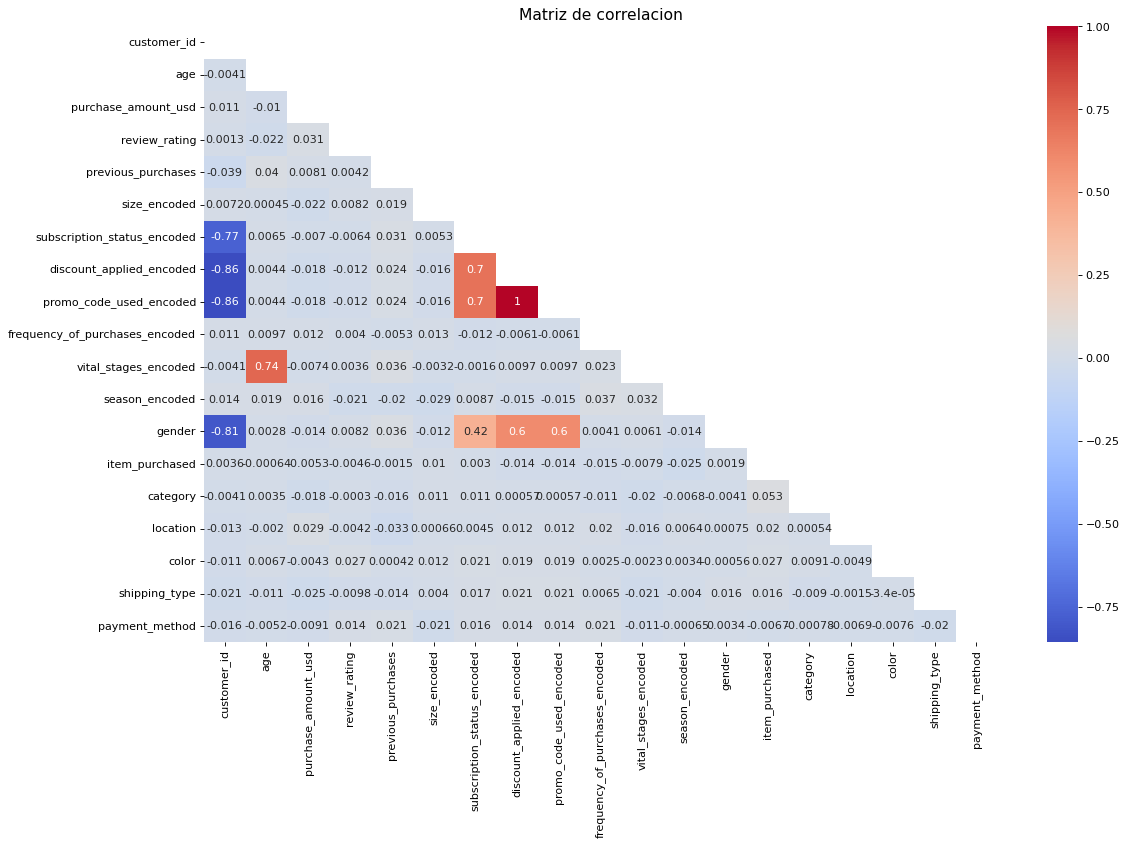

In [5]:
# creo una matriz de correlacion traingular, eliminando la parte espejo por mdeio de una mask creada con mumpy
matriz_corr = df_estandarizado_escalado.corr()
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
sns.heatmap(data=matriz_corr, mask = mask, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion')
plt.show()

In [6]:
columns_with_high_correlation = ['customer_id', 'age','previous_purchases', 'subscription_status_encoded','discount_applied_encoded', 'promo_code_used_encoded','vital_stages_encoded','season_encoded', 'gender', 'shipping_type']

Pairplot

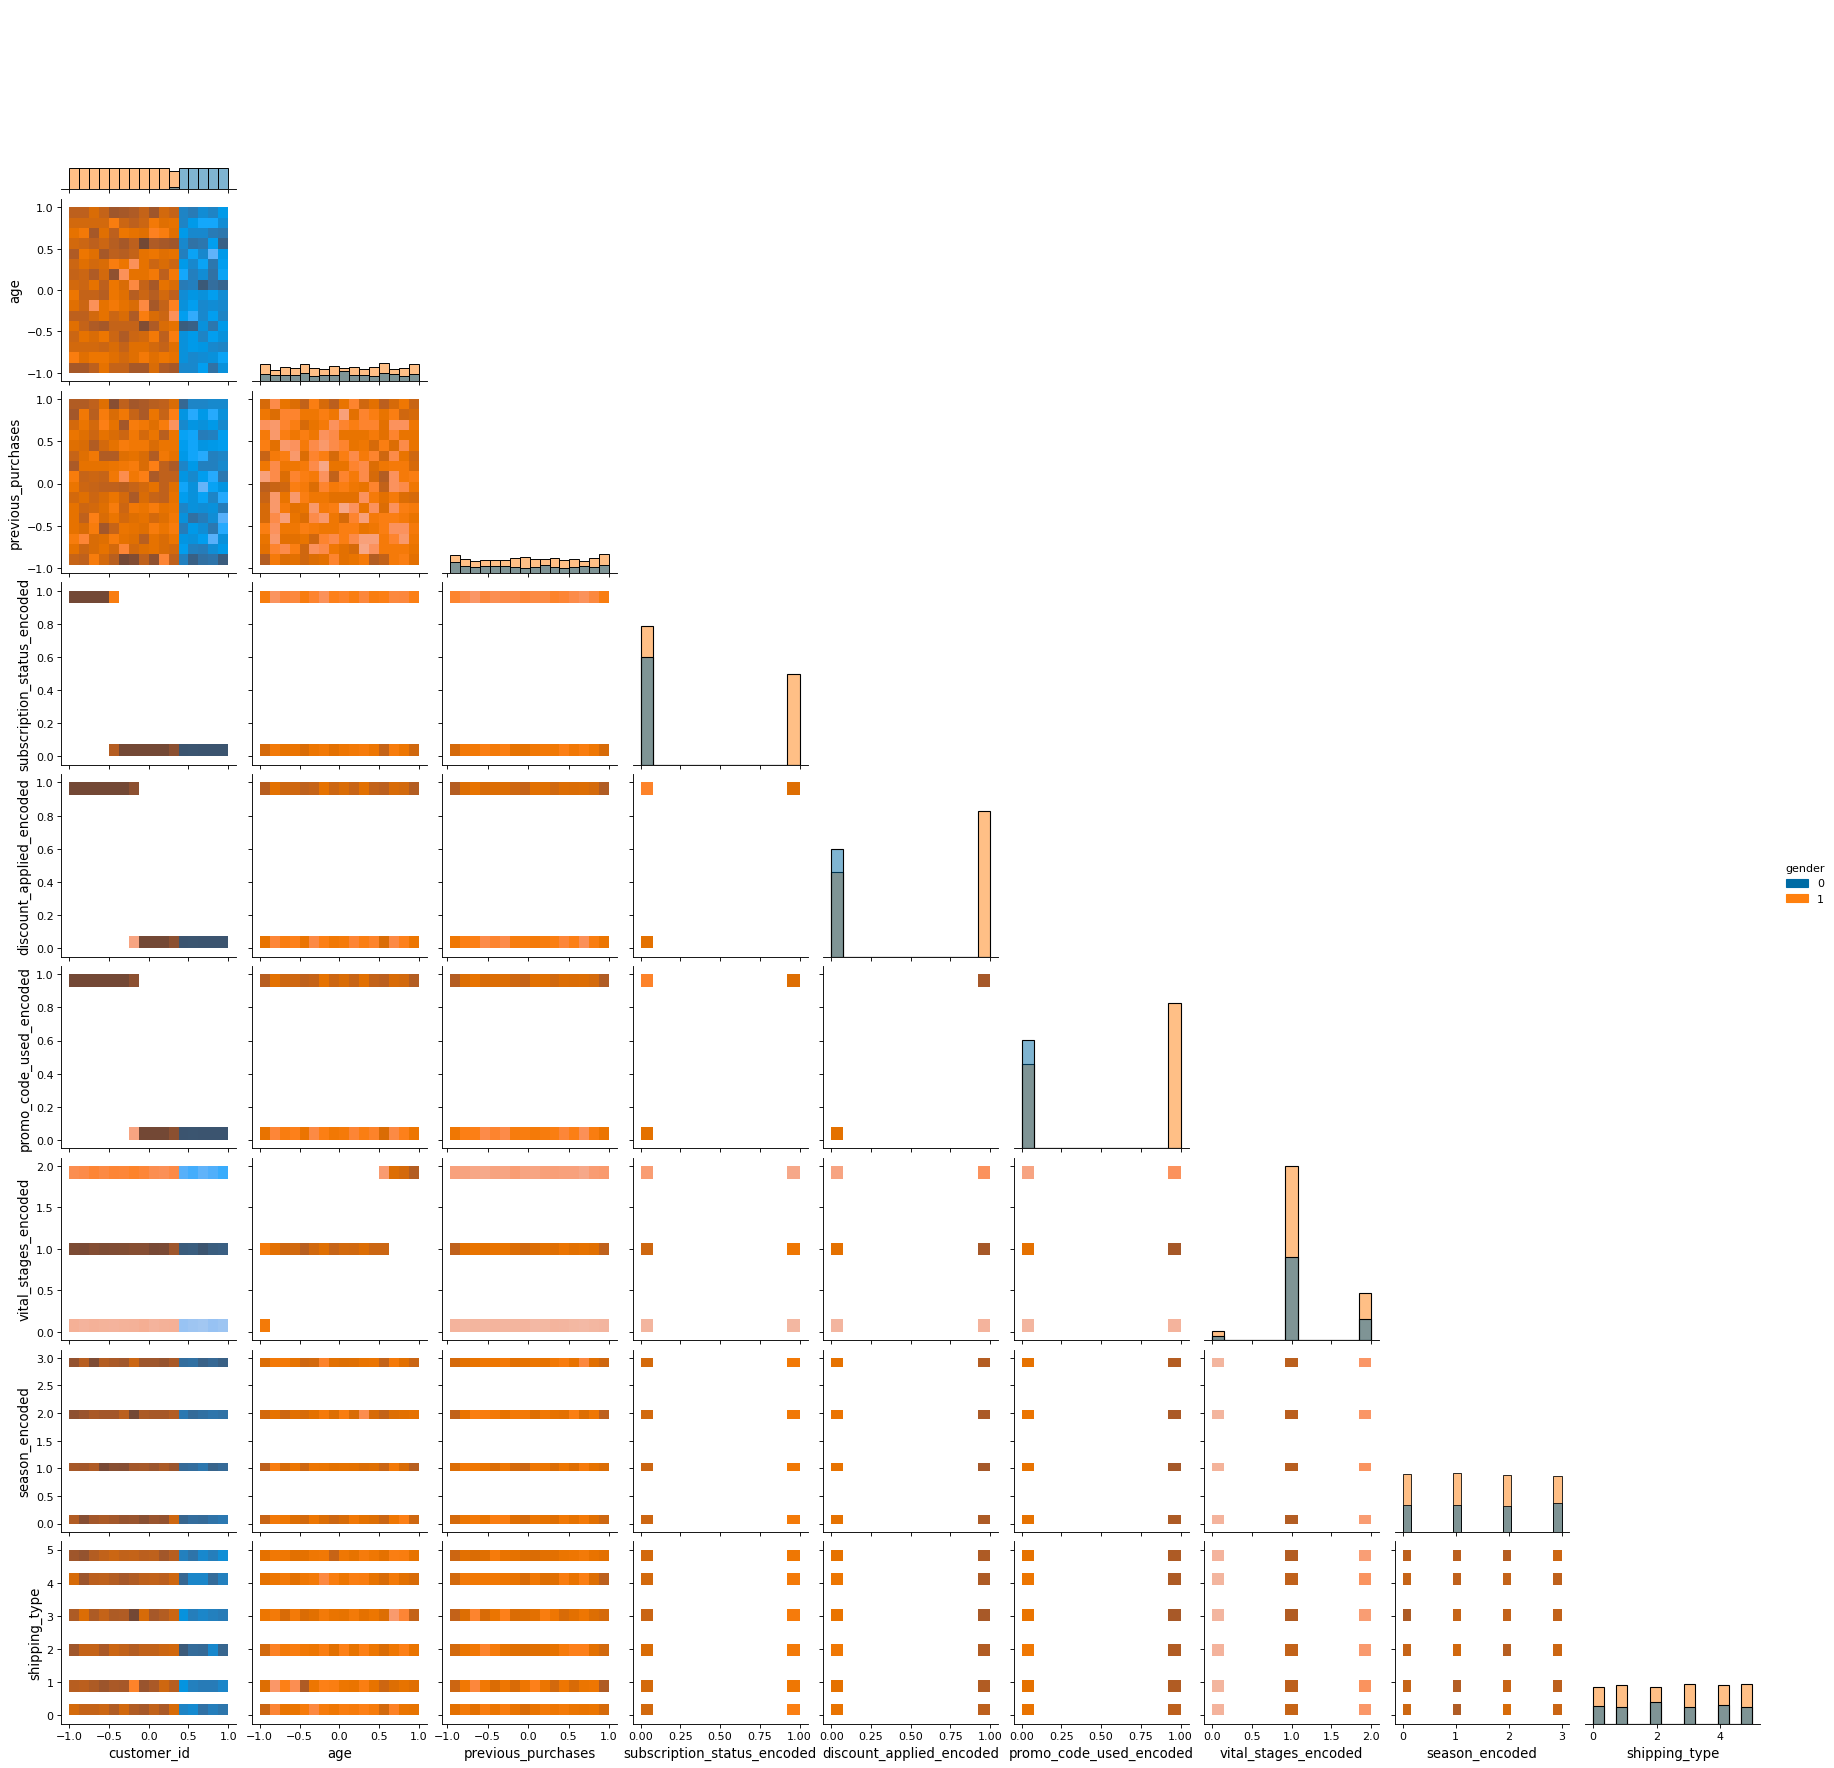

In [7]:
sns.pairplot(data=df_estandarizado_escalado[columns_with_high_correlation], corner=True, hue='gender', kind='hist', markers='*', diag_kind='auto')
plt.show()

In [8]:
columns_with_high_correlation.remove('customer_id')

### Univariables

#### Descriptivos

**Cualitativo**

Nominales u ordinales

In [9]:
# Histplot
columns_with_high_correlation_not_encoded_histplot = [
 'subscription_status',
 'discount_applied',
 'promo_code_used',
 'gender',
 'shipping_type']

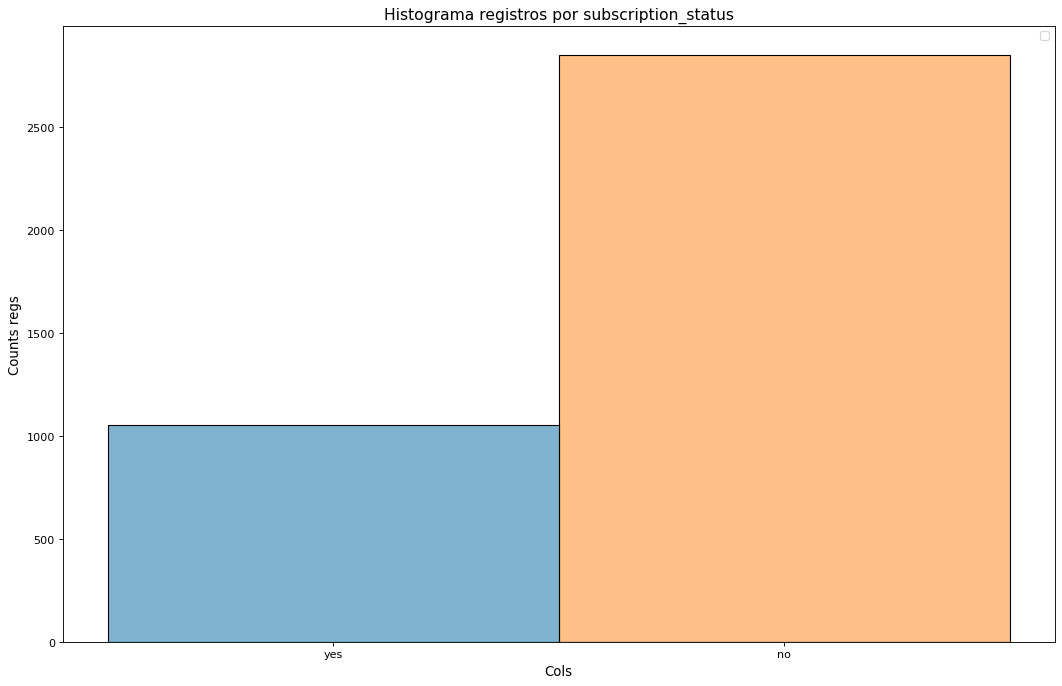

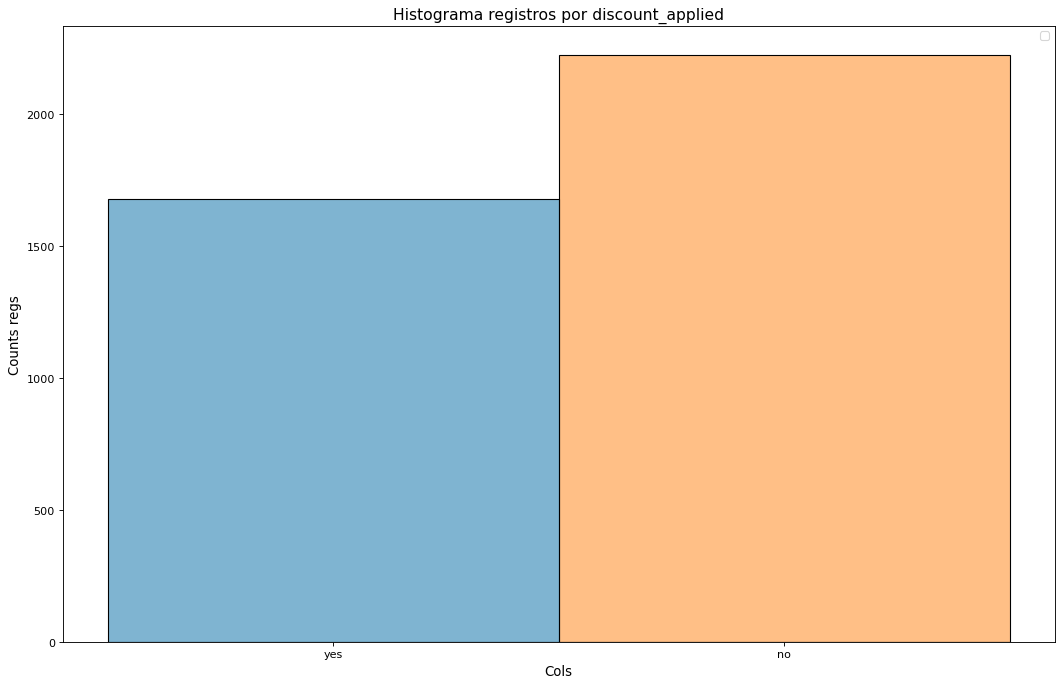

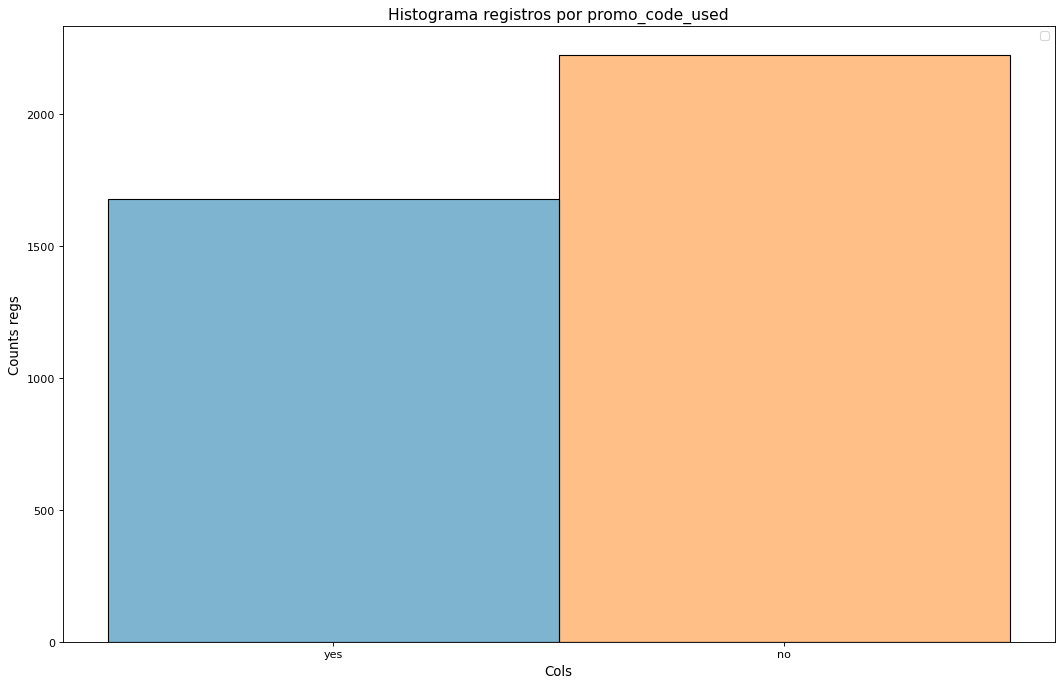

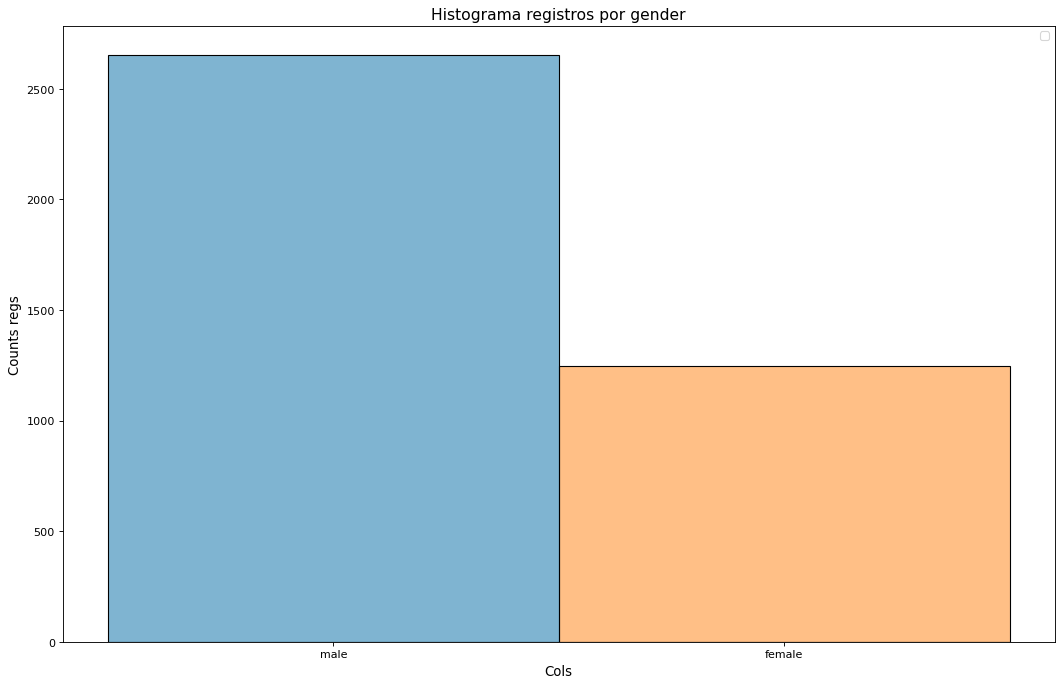

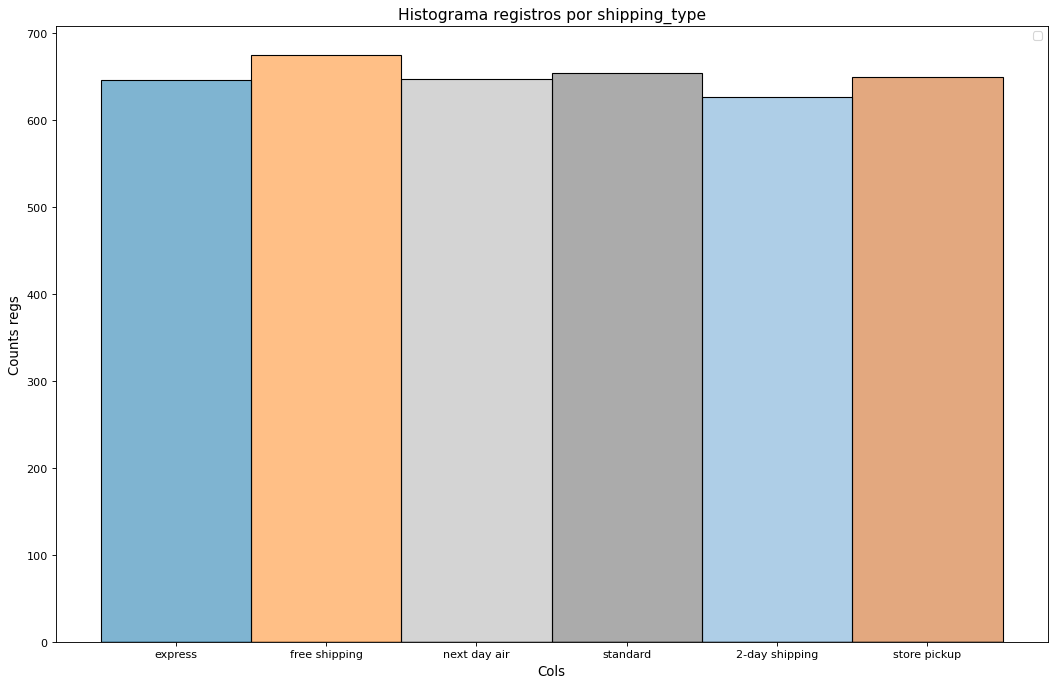

In [10]:
for col in columns_with_high_correlation_not_encoded_histplot:
    sns.histplot(data=df_procesado[columns_with_high_correlation_not_encoded_histplot], x=col, stat='count', bins='auto', hue=col, legend=False)
    plt.title(f'Histograma registros por {col}')
    plt.ylabel('Counts regs')
    plt.xlabel('Cols')
    plt.legend([])
    plt.xticks()
    plt.show()

**Cuantitativos**

Intervalos

In [11]:
columns_with_high_correlation_encoded_lineplot = ['vital_stages_encoded', 'season_encoded']

In [12]:
columns_with_high_correlation_not_encoded_lineplot = ['vital_stages','season']

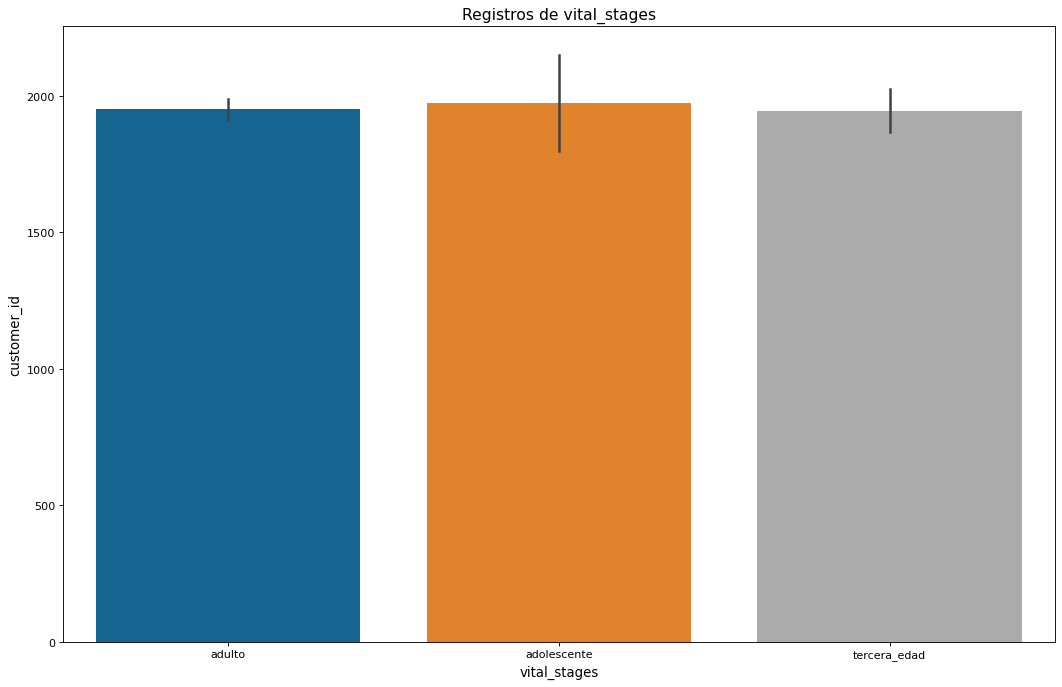

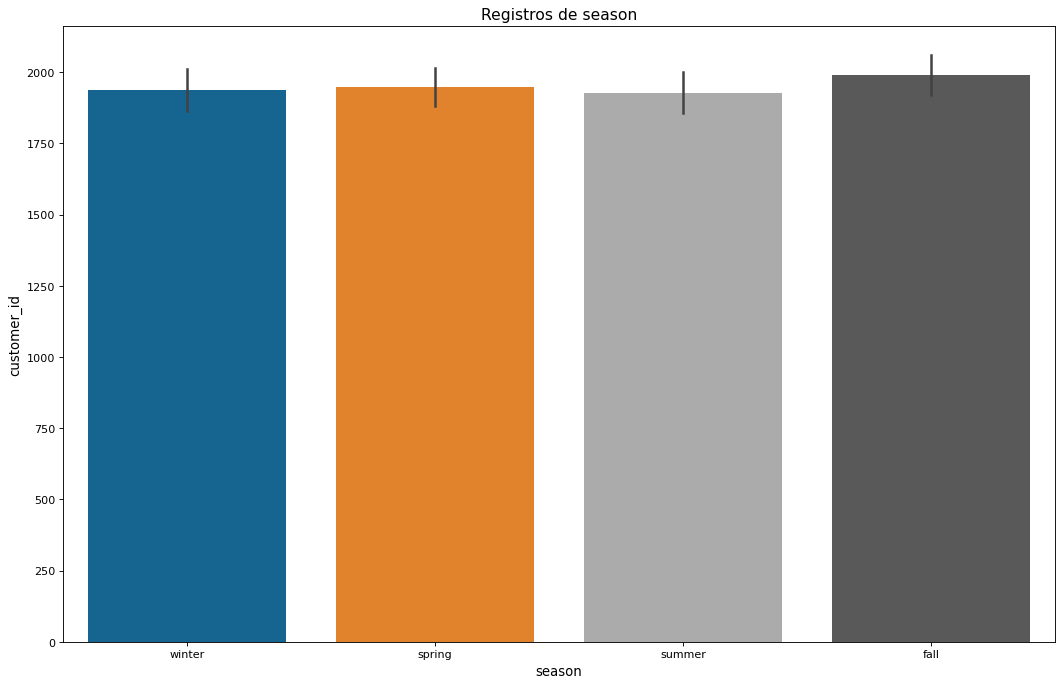

In [13]:
for col in columns_with_high_correlation_not_encoded_lineplot:
    sns.barplot(data=df_procesado, x=col, y='customer_id', hue=col)
    plt.title(f'Registros de {col}')
    plt.show()

### Tendencia

**Cuantitativos**

Intervalos

In [14]:
#  Diagrama de cajas (Boxplot)
columns_with_high_correlation_not_encoded_boxplot = ['age']

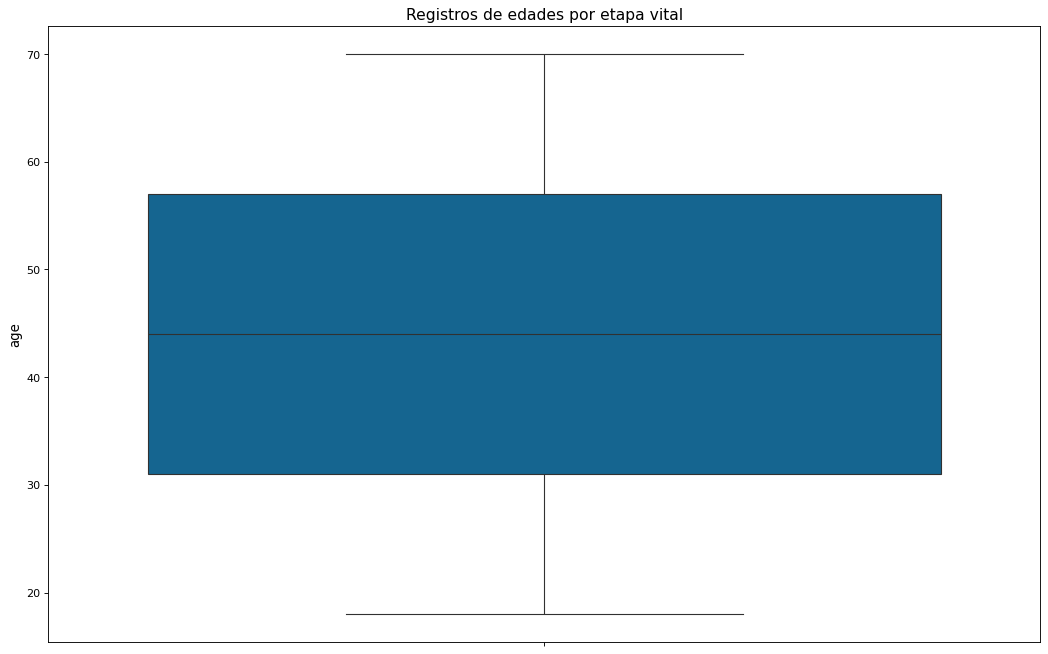

In [15]:
sns.boxplot(data=df_procesado, y='age')
plt.title('Registros de edades por etapa vital')
plt.show()

### Bivariado

#### Distribucion

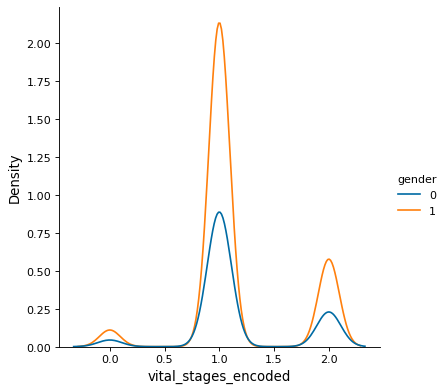

In [32]:
sns.displot(data=df_estandarizado_escalado, x="vital_stages_encoded", hue="gender", kind="kde")
plt.show()


**Observacion de correlaciones lineales significativas**


completar

**Observacion de correlaciones lineales con la variable target (subscribed):**


completar

### Perfil socio-economico de los clientes

Documentar conclusiones generales

### Analisis de suscripcion

Completar cocumentacion de subscripciones